# 02: Cross-validation

# 02: Cross-validation

## p15 red wine quality dataset

In [1]:
import pandas as pd
df = pd.read_csv("./data/winequality-red.csv")

In [2]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# you ca use the map funvtion of pandas with
# any dictionary to convert the values gieven
# column to values in the dictionary
df.loc[: ,"quality"] = df.quality.map(quality_mapping)

In [4]:
df.quality.map

<bound method Series.map of 0       2
1       2
2       2
3       3
4       2
       ..
1594    2
1595    3
1596    3
1597    2
1598    3
Name: quality, Length: 1599, dtype: int64>

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


## P16

In [6]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the data frame
# sample()メソッドに引数frac=1を指定すると、ランダムサンプリングをすることができる。
# reset_index()でインデックスを連番に振り直し
# 元のindexを削除: 引数drop
# 引数dropをTrueとすると、元のindexは削除され残らない。
df = df.sample(frac = 1).reset_index(drop = True)

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.1,0.560,0.00,2.2,0.079,6.0,9.0,0.99480,3.59,0.54,11.5,3
1,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,2
2,10.5,0.390,0.46,2.2,0.075,14.0,27.0,0.99598,3.06,0.84,11.4,3
3,7.2,0.340,0.24,2.0,0.071,30.0,52.0,0.99576,3.44,0.58,10.1,2
4,6.5,0.460,0.14,2.4,0.114,9.0,37.0,0.99732,3.66,0.65,9.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,8.7,0.765,0.22,2.3,0.064,9.0,42.0,0.99630,3.10,0.55,9.4,2
1595,10.6,0.360,0.57,2.3,0.087,6.0,20.0,0.99676,3.14,0.72,11.1,4
1596,8.2,0.350,0.33,2.4,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,3
1597,6.6,0.700,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2,2


In [8]:
# top 1000 rows are selected 
# for training 
df_train = df.head(1000) 

In [9]:
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.1,0.560,0.00,2.2,0.079,6.0,9.0,0.99480,3.59,0.54,11.5,3
1,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,2
2,10.5,0.390,0.46,2.2,0.075,14.0,27.0,0.99598,3.06,0.84,11.4,3
3,7.2,0.340,0.24,2.0,0.071,30.0,52.0,0.99576,3.44,0.58,10.1,2
4,6.5,0.460,0.14,2.4,0.114,9.0,37.0,0.99732,3.66,0.65,9.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0.590,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,9.8,2
996,5.6,0.850,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,5
997,6.7,0.670,0.02,1.9,0.061,26.0,42.0,0.99489,3.39,0.82,10.9,3
998,9.9,0.440,0.46,2.2,0.091,10.0,41.0,0.99638,3.18,0.69,11.9,3


In [10]:
# bottom 599 values are selected 
# for testing/validation 
df_test = df.tail(599) 

In [11]:
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1000,7.0,0.600,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2,2
1001,5.6,0.620,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.1,1
1002,9.8,0.450,0.38,2.5,0.081,34.0,66.0,0.99726,3.15,0.58,9.8,2
1003,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,2
1004,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,8.7,0.765,0.22,2.3,0.064,9.0,42.0,0.99630,3.10,0.55,9.4,2
1595,10.6,0.360,0.57,2.3,0.087,6.0,20.0,0.99676,3.14,0.72,11.1,4
1596,8.2,0.350,0.33,2.4,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,3
1597,6.6,0.700,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2,2


In [12]:
# import from scikit-learn 
from sklearn import tree 
from sklearn import metrics 

In [13]:
# initialize decision tree classifier class 
# with a max_depth of 3 
clf = tree.DecisionTreeClassifier(max_depth=3) 

In [14]:
# choose the columns you want to train on 
# these are the features for the model 
cols = ['fixed acidity',  
        'volatile acidity',  
        'citric acid', 
        'residual sugar', 
        'chlorides', 
        'free sulfur dioxide', 
        'total sulfur dioxide', 
        'density', 
        'pH', 
        'sulphates', 
        'alcohol'] 

In [15]:
# train the model on the provided features 
# and mapped quality from before 
clf.fit(df_train[cols], df_train.quality) 

DecisionTreeClassifier(max_depth=3)

In [16]:
# generate predictions on the training set 
train_predictions = clf.predict(df_train[cols]) 

In [17]:
# generate predictions on the test set 
test_predictions = clf.predict(df_test[cols]) 

In [18]:
# calculate the accuracy of predictions on 
# training data set 
train_accuracy = metrics.accuracy_score( 
    df_train.quality, train_predictions 
) 

In [19]:
train_accuracy

0.598

In [20]:
# calculate the accuracy of predictions on 
# test data set 
test_accuracy = metrics.accuracy_score( 
    df_test.quality, test_predictions 
) 

In [21]:
test_accuracy

0.5509181969949917

## P18～

In [22]:
# import scikit-learn tree and metrics 
from sklearn import tree 
from sklearn import metrics 

In [23]:
# import matplotlib and seaborn 
# for plotting 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [24]:
# this is our global size of label text 
# on the plots 
matplotlib.rc('xtick', labelsize=20)  
matplotlib.rc('ytick', labelsize=20)  

In [25]:
# This line ensures that the plot is displayed 
# inside the notebook 
%matplotlib inline 

In [26]:
# initialize lists to store accuracies 
# for training and test data 
# we start with 50% accuracy 
train_accuracies = [0.5] 
test_accuracies = [0.5] 

In [27]:
# iterate over a few depth values 
for depth in range(1, 25): 
    # init the model 
    clf = tree.DecisionTreeClassifier(max_depth=depth) 
 
    # columns/features for training 
    # note that, this can be done outside  
    # the loop 
    cols = [ 
        'fixed acidity',  
        'volatile acidity', 
        'citric acid',  
        'residual sugar', 
        'chlorides', 
        'free sulfur dioxide',  
        'total sulfur dioxide', 
        'density', 
        'pH',  
        'sulphates', 
        'alcohol'
    ] 
    # fit the model on given features 
    clf.fit(df_train[cols], df_train.quality) 
    
    # create training & test predictions 
    train_predictions = clf.predict(df_train[cols]) 
    test_predictions = clf.predict(df_test[cols]) 
    
    # calculate training & test accuracies 
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    ) 
    
    # append accuracies 
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)  

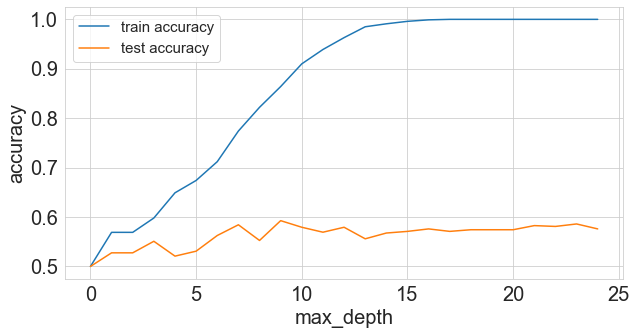

In [28]:
# create two plots using matplotlib 
# and seaborn 
plt.figure(figsize=(10, 5)) 
sns.set_style("whitegrid") 
plt.plot(train_accuracies, label="train accuracy") 
plt.plot(test_accuracies, label="test accuracy") 
plt.legend(loc="upper left", prop={'size': 15}) 
plt.xticks(range(0, 26, 5)) 
plt.xlabel("max_depth", size=20) 
plt.ylabel("accuracy", size=20) 
plt.show() 

In [29]:
# 訓練用とテスト用dfをCSVで保存
df_train.to_csv('./data/train.csv')
df_train.to_csv('./data/train.csv')